# Project Development

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data=pd.read_csv("saved_model/dataset/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### **1. Handle missing values**

In [3]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# remove duplicate value
data.duplicated().sum()

0

In [6]:
#if duplicated value were present
# data.drop_duplicates(inplace=True) / data= data.drop_duplicates()

In [7]:
#removing unwanted data/columns
data.drop(labels=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
data.tail() 


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [8]:
# select column which have categorical value
catagorical_cols=data.select_dtypes(include= 'object').columns
numerical_cols=data.select_dtypes(exclude= 'object').columns
print("catagorical_cols", catagorical_cols )
print("numerical_cols", numerical_cols)

catagorical_cols Index(['Geography', 'Gender'], dtype='object')
numerical_cols Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [9]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [11]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
data.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

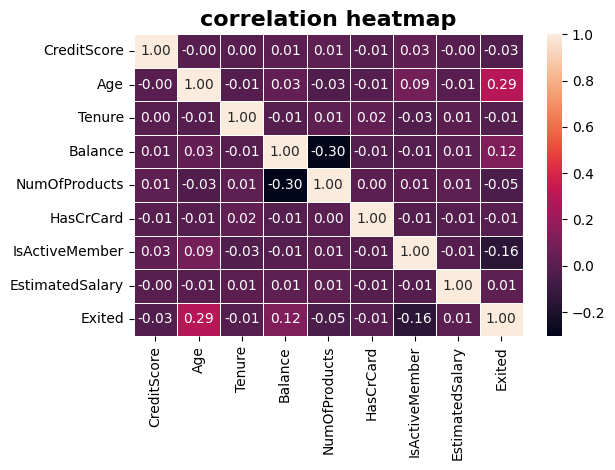

In [13]:
#correlation ==> heatmap
plt.Figure(figsize=(14,10))
corr_matrix=data[numerical_cols].corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
)
plt.title("correlation heatmap", fontsize= 16, fontweight= "bold")
plt.tight_layout()
plt.show()

In [14]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
#dependent and independent features
X=data.drop('Exited', axis=1)
y=data['Exited']

In [16]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
catagorical_cols=X.select_dtypes(include= 'object').columns
numerical_cols=X.select_dtypes(exclude= 'object').columns

print("catagorical_cols", catagorical_cols )
print("numerical_cols", numerical_cols)

catagorical_cols Index(['Geography', 'Gender'], dtype='object')
numerical_cols Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [18]:
# categorical data to numerical data
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
#pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [19]:
gender_cat=['Female', 'Male']
geo_cat=['France','Spain', 'Germany']

In [20]:
num_pipeline= Pipeline(steps=[('scaler', StandardScaler())])

cat_pipeline= Pipeline(steps=[('OrdinalEncoder',OrdinalEncoder(
            categories=[geo_cat, gender_cat]))])

preprocessor= ColumnTransformer(
         [("num_pipeline", num_pipeline, numerical_cols),
         ("cat_pipeline", cat_pipeline, catagorical_cols)]
)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [22]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train), columns= preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())

In [23]:
X_train.head()

,num_pipeline__CreditScore,num_pipeline__Age,num_pipeline__Tenure,num_pipeline__Balance,num_pipeline__NumOfProducts,num_pipeline__HasCrCard,num_pipeline__IsActiveMember,num_pipeline__EstimatedSalary,cat_pipeline__Geography,cat_pipeline__Gender
0,0.356500,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,0.0,1.0
1,-0.203898,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,2.0,1.0
2,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,1.0,1.0
3,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,0.0,0.0
4,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,0.0,1.0


### **Feature Engineering**

In [24]:
import pickle
with open ("saved_model/preprocessing.pkl", "wb") as f:
    pickle.dump(preprocessor,f)

### **ANN Implementation**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential #to create layers
from tensorflow.keras.layers import Dense #to create hidden nodes
from tensorflow.keras.callbacks  import EarlyStopping, TensorBoard
import datetime

In [28]:
X_train.shape[1],

(10,)

In [31]:
model=Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),                                   #it'll create 64 nodes in first hidden layer
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')                                                       
])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                704       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow
opt= tensorflow.keras.optimizers.Adam(learning_rate=0.001) #smaller the learning rate, better.(learns more, reacher global minima)

In [38]:
model.compile(optimizer=opt,
               loss= "binary_crossentropy",
               metrics=["accuracy"]
               )

In [42]:
log_dir="logs/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback= TensorBoard(log_dir= log_dir, histogram_freq=1)

In [ ]:
## Earlystopping
early_stopping_callback= EarlyStopping(
    monitor="val_loss",
    patience= 5,
    restore_best_weights= True
)
#epoch

In [48]:
## train model
history=model.fit(
    X_train, y_train,
    validation_data= (X_test, y_test),
    epochs= 100,
    callbacks= [tensorflow_callback, early_stopping_callback]
)

Epoch 1/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3191 - accuracy: 0.8670 - val_loss: 0.3402 - val_accuracy: 0.8615
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3188 - accuracy: 0.8671 - val_loss: 0.3368 - val_accuracy: 0.8605
Epoch 3/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3175 - accuracy: 0.8679 - val_loss: 0.3385 - val_accuracy: 0.8625
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3176 - accuracy: 0.8683 - val_loss: 0.3394 - val_accuracy: 0.8610
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3158 - accuracy: 0.8677 - val_loss: 0.3389 - val_accuracy: 0.8605
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3142 - accuracy: 0.8696 - val_loss: 0.3428 - val_accuracy: 0.8595
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3142 - accuracy: 0.8684 - val_loss: 0.3389 - val_accuracy: 0.8625

In [49]:
model.save("model.h5")

c:\Users\aqusa\anaconda3\envs\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
loss= history.history['loss']
acc=history.history['accuracy']
val_loss=history.history['val_loss']
val_acc=history.history['val_accuracy']

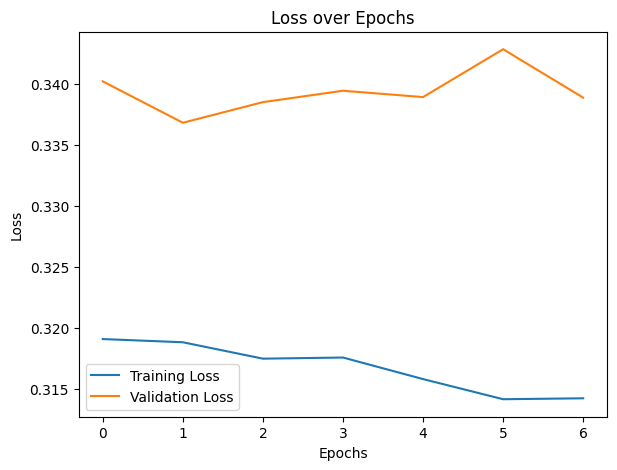

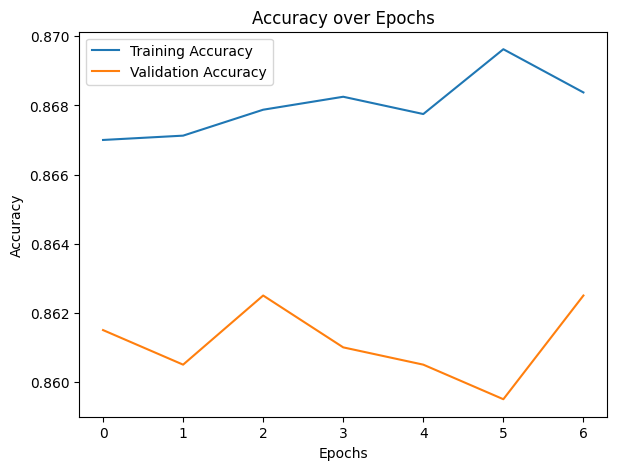

In [56]:
epochs = len(acc)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 2)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [52]:
##load tensorboard

%load_ext tensorboard

In [54]:
%tensorboard --logdir logs/

Reusing TensorBoard on port 6006 (pid 9668), started 0:00:30 ago. (Use '!kill 9668' to kill it.)